In [1]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('data/names.txt', 'r') as f:
    words = f.read().splitlines()

In [3]:
print(words[:10])

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']


In [4]:
len(words)

32033

In [5]:
chars = sorted(list(set(''.join(words))))
print(chars)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [6]:
stoi = {s:i + 1 for i, s in enumerate(chars)}
stoi['.'] = 0
print(stoi)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [7]:
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [8]:
# build the dataset

block_size = 3 # context length
X, Y = [], []
for w in words[:5]:
    print(w)
    # Лист болванка из 0 для дальнейшего заполнения
    context = [0] * block_size
    # print(context)
    for ch in w + '.':
        # Индекс символа в словаре
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)

        print(''.join(itos[i] for i in context), '------>', itos[ix])
        # Убрали первый символ, добавили новый
        context = context[1:] + [ix] # crop and append
        # print(context)

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ------> e
..e ------> m
.em ------> m
emm ------> a
mma ------> .
olivia
... ------> o
..o ------> l
.ol ------> i
oli ------> v
liv ------> i
ivi ------> a
via ------> .
ava
... ------> a
..a ------> v
.av ------> a
ava ------> .
isabella
... ------> i
..i ------> s
.is ------> a
isa ------> b
sab ------> e
abe ------> l
bel ------> l
ell ------> a
lla ------> .
sophia
... ------> s
..s ------> o
.so ------> p
sop ------> h
oph ------> i
phi ------> a
hia ------> .


In [9]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [10]:
X[:5]

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1]])

In [11]:
# EmbeddingTable
C = torch.randn((27, 2))
C

tensor([[ 1.2274e+00, -7.6902e-01],
        [-7.4234e-01, -5.8625e-01],
        [-7.6852e-01,  7.9781e-02],
        [-1.1495e+00, -6.7142e-01],
        [-1.1811e-01,  5.1965e-01],
        [-5.8529e-02,  5.9896e-01],
        [ 5.4779e-01,  6.0995e-01],
        [ 4.6670e-01,  2.3313e-01],
        [-2.5191e-01,  1.1933e+00],
        [ 2.1293e-03,  1.5034e+00],
        [-2.0739e+00, -1.4653e-01],
        [ 1.5899e+00, -3.0448e-01],
        [-4.6801e-01, -7.7072e-01],
        [ 1.0580e+00, -5.0380e-01],
        [ 7.1152e-01, -5.2000e-01],
        [ 6.7413e-01, -3.8477e-02],
        [ 1.4708e+00,  8.7761e-01],
        [ 8.1181e-01, -1.9466e-02],
        [ 4.7577e-01,  1.3109e+00],
        [-8.5248e-01,  3.1251e-01],
        [-1.9422e+00, -1.9489e+00],
        [ 2.4504e-01, -1.8260e-01],
        [ 4.1663e-01,  2.3069e+00],
        [ 4.1308e-01, -2.9778e-01],
        [ 7.3708e-01,  4.0143e-01],
        [ 3.5912e-01,  2.1007e+00],
        [-1.3804e+00, -1.3286e+00]])

In [12]:
F.one_hot(torch.tensor(5), num_classes=27)

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [13]:
C[5]

tensor([-0.0585,  0.5990])

In [14]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-0.0585,  0.5990])

In [15]:
C[[5, 6, 7]]

tensor([[-0.0585,  0.5990],
        [ 0.5478,  0.6099],
        [ 0.4667,  0.2331]])

In [16]:
C[torch.tensor([5, 6, 7])]

tensor([[-0.0585,  0.5990],
        [ 0.5478,  0.6099],
        [ 0.4667,  0.2331]])

In [17]:
C[torch.tensor([5, 6, 7, 7, 7, 7])]

tensor([[-0.0585,  0.5990],
        [ 0.5478,  0.6099],
        [ 0.4667,  0.2331],
        [ 0.4667,  0.2331],
        [ 0.4667,  0.2331],
        [ 0.4667,  0.2331]])

In [18]:
X.shape

torch.Size([32, 3])

In [19]:
C[X].shape

torch.Size([32, 3, 2])

In [20]:
X[13, 2]

tensor(1)

In [21]:
C[X][13, 2]

tensor([-0.7423, -0.5863])

In [22]:
C[1]

tensor([-0.7423, -0.5863])

In [23]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [24]:
# 100 - кол-во нейронов
# 6 потому что передаем по 2 эмбеддинга для каждого из 3 символов контекста
W1 = torch.randn(6, 100)
b1 = torch.randn(100)

In [25]:
# emb @ W1 + b1

In [26]:
emb.shape

torch.Size([32, 3, 2])

In [27]:
emb[:, 0, :].shape, emb[:, 1, :].shape, emb[:, 2, :].shape

(torch.Size([32, 2]), torch.Size([32, 2]), torch.Size([32, 2]))

In [28]:
# Соединение эмбеддингов подряд идущих символов контекста
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

https://docs.pytorch.org/docs/stable/generated/torch.cat.html

https://docs.pytorch.org/docs/stable/generated/torch.unbind.html

Вариант на произвольное кол-во измерений, unbind расцепляет по указанному измерению на лист тензоров, и потом их все можно скрепить через cat

In [29]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [30]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [31]:
a.shape

torch.Size([18])

In [32]:
a.view(2, 9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [33]:
a.view(3, 3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

Любой тензор в памяти хранится как одномерная последовательность, через .view можно его увидеть в любой размерности

In [34]:
a.storage()

/var/folders/zs/lr774nl56f317p1kp7zdfxjc0000gn/T/ipykernel_19145/214256462.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [35]:
emb.shape

torch.Size([32, 3, 2])

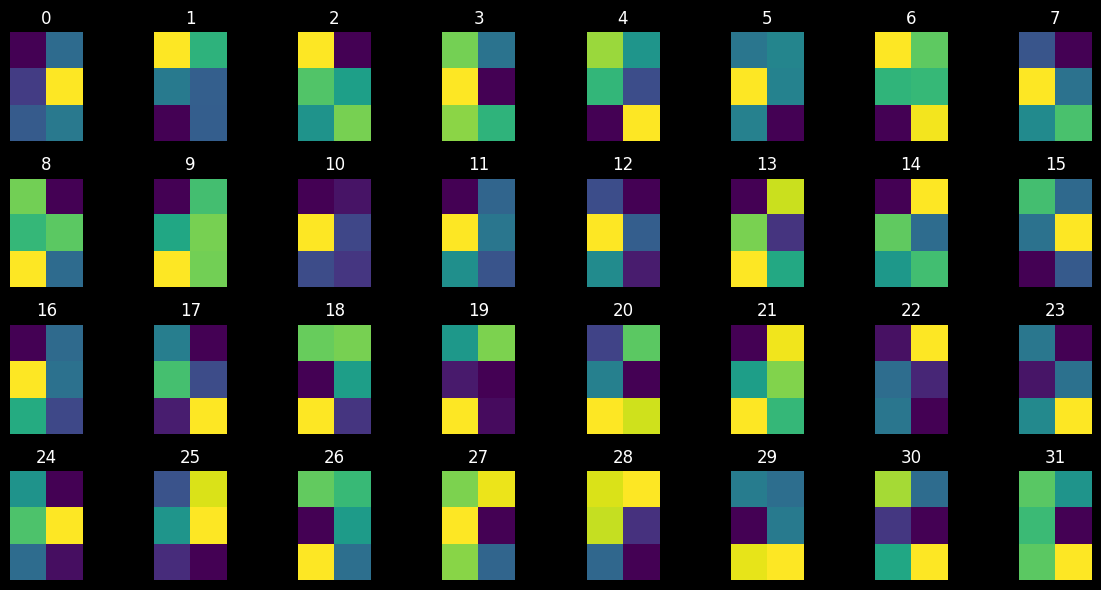

In [36]:
x = torch.randn(32, 3, 2)

fig, axes = plt.subplots(4, 8, figsize=(12, 6))
axes = axes.flatten()

for i in range(32):
    axes[i].imshow(x[i], cmap="viridis")
    axes[i].set_title(f"{i}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [37]:
x = torch.randn(32, 3, 2)
x = x.view(32, -1)
x.shape

torch.Size([32, 6])

In [38]:
emb[2]

tensor([[ 1.2274, -0.7690],
        [-0.0585,  0.5990],
        [ 1.0580, -0.5038]])

Каждая таблица 3 буквы x 2 энкодинга была растянута в вектор из 6 чисел

Под капотом тензор это одномерный массив длиной 192, который сгибается в нужное кол-во измерений.
В нашем случае первое измерение 32 - кол-во примеров, второе измерение 2 - кол-во эмбеддингов для каждого примера, и 3 - кол-во примеров. Каждый пример это 6 подряд идущих цифр, и мы разгибаем их из представления 3x2 в 6x1

In [39]:
emb.view(32, 6)[2]

tensor([ 1.2274, -0.7690, -0.0585,  0.5990,  1.0580, -0.5038])

In [40]:
len(emb.storage())

192

In [41]:
torch.cat(torch.unbind(emb, 1), 1) == emb.view(32, 6)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [42]:
# Если указно -1, pytorch сам вычислит какая размерность должна быть
# h = emb.view(32, 6) @ W1
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
h

tensor([[-0.9172, -0.8527,  0.9932,  ...,  0.8752,  0.9476, -0.9321],
        [-0.8949, -0.4348,  0.0747,  ..., -0.0908,  0.9946, -0.9910],
        [-0.3928, -0.9663,  0.9832,  ...,  0.3934,  0.5033, -0.9666],
        ...,
        [-0.2762, -0.9871,  0.7797,  ...,  0.9357,  0.9784, -0.9740],
        [ 0.9336, -0.9997,  0.7220,  ..., -0.8695,  0.9833, -0.9997],
        [ 0.9863, -0.9997,  0.6290,  ..., -0.3267, -0.7845, -0.2204]])

cat и unbind под капотом создают новые tensor и занимают память, поэтому лучше использовать view

In [43]:
h.shape

torch.Size([32, 100])

In [44]:
(emb.view(-1, 6) @ W1 + b1).shape

torch.Size([32, 100])

In [45]:
b1.shape

torch.Size([100])

In [46]:
# Обязательно проверять, что broadcastring каботает как надо
# 32 100
# 1  100

In [47]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [48]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [49]:
counts = logits.exp()
counts[:5]

tensor([[1.0674e+00, 1.8005e+03, 4.5468e+02, 3.1270e-01, 5.8844e+01, 2.5199e+05,
         3.8003e+07, 9.2430e-01, 6.6489e-06, 5.7924e-01, 1.8588e+03, 2.4144e-04,
         7.3753e+04, 4.4977e-01, 1.0102e-03, 5.0053e-03, 3.8442e-02, 6.2088e+05,
         3.7688e-01, 5.4366e-05, 2.3329e+03, 1.6070e-01, 9.7769e-04, 4.5394e+08,
         5.9426e-07, 4.2212e-08, 6.2316e-06],
        [1.4593e-01, 1.7697e+05, 5.4365e-03, 6.1611e-02, 7.0310e-03, 3.2233e+01,
         3.3554e+04, 1.6330e+00, 1.9972e+00, 2.4254e+00, 2.5553e+02, 4.7503e+00,
         2.7498e+00, 1.5005e+05, 1.1500e-02, 6.2548e-01, 3.6013e-02, 2.5928e+00,
         9.2182e+01, 3.7586e-04, 4.3959e+00, 3.7943e+00, 1.0306e-01, 3.6054e+05,
         5.5109e-02, 3.1577e-04, 2.1919e-06],
        [7.4029e+04, 2.3468e+01, 3.9597e+01, 1.2012e-01, 1.5497e+06, 2.1773e+04,
         1.2702e+02, 2.3253e+00, 7.6606e-05, 2.6158e-01, 9.3911e+06, 1.2647e+01,
         2.0241e+04, 1.0496e-02, 2.4795e-05, 2.6759e+00, 1.1757e+02, 3.5215e+07,
         2.7260e-

In [50]:
prob = counts / counts.sum(1, keepdim=True)
prob[:5]

tensor([[2.1655e-09, 3.6529e-06, 9.2247e-07, 6.3442e-10, 1.1938e-07, 5.1124e-04,
         7.7102e-02, 1.8753e-09, 1.3490e-14, 1.1752e-09, 3.7712e-06, 4.8984e-13,
         1.4963e-04, 9.1250e-10, 2.0494e-12, 1.0155e-11, 7.7992e-11, 1.2597e-03,
         7.6463e-10, 1.1030e-13, 4.7330e-06, 3.2603e-10, 1.9836e-12, 9.2096e-01,
         1.2057e-15, 8.5642e-17, 1.2643e-14],
        [2.0226e-07, 2.4528e-01, 7.5348e-09, 8.5392e-08, 9.7448e-09, 4.4674e-05,
         4.6504e-02, 2.2633e-06, 2.7680e-06, 3.3615e-06, 3.5416e-04, 6.5838e-06,
         3.8112e-06, 2.0796e-01, 1.5939e-08, 8.6690e-07, 4.9913e-08, 3.5935e-06,
         1.2776e-04, 5.2093e-10, 6.0926e-06, 5.2588e-06, 1.4283e-07, 4.9969e-01,
         7.6380e-08, 4.3765e-10, 3.0379e-12],
        [1.4803e-03, 4.6928e-07, 7.9180e-07, 2.4021e-09, 3.0989e-02, 4.3538e-04,
         2.5401e-06, 4.6499e-08, 1.5319e-12, 5.2308e-09, 1.8779e-01, 2.5290e-07,
         4.0475e-04, 2.0989e-10, 4.9581e-13, 5.3510e-08, 2.3511e-06, 7.0418e-01,
         5.4512e-

In [51]:
prob.shape

torch.Size([32, 27])

In [52]:
prob.sum(1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

Кол-во ответов которое надо дать

In [53]:
prob[torch.arange(32), Y]

tensor([5.1124e-04, 2.0796e-01, 2.0989e-10, 1.9352e-08, 7.5292e-11, 1.0155e-11,
        8.3148e-06, 3.5231e-06, 8.6334e-01, 3.4045e-08, 4.3180e-14, 8.3939e-07,
        3.6529e-06, 4.1412e-08, 8.8079e-01, 1.8541e-06, 1.1752e-09, 1.6559e-08,
        4.2187e-05, 3.3598e-03, 6.1617e-14, 4.3542e-11, 1.2913e-06, 1.0226e-11,
        2.7456e-10, 1.1030e-13, 6.1227e-07, 1.0122e-07, 3.0647e-09, 3.4249e-03,
        1.2294e-03, 2.6006e-07])

In [54]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(15.7443)

### Переписано в чистый вид

In [55]:
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [56]:
g = torch.Generator().manual_seed(42)

# Матрица энкодингов
C = torch.randn((27, 2), generator=g)
# На вход три символа, закодированных 2 эмбеддингами = 6, в слое 100 нейронов
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100)
# На вход активации 100 нейронов, на выход вероятность каждой из 27 букв
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

In [57]:
sum(p.nelement() for p in parameters)

3481

In [58]:
# Forward pass
emb = C[X] # 32 2 3
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
logits = h @ W2 + b2
counts = logits.exp()
prob = counts / counts.sum(1, keepdim=True)
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(23.3049)

In [59]:
F.cross_entropy(logits, Y)

tensor(23.3049)

In [60]:
for p in parameters:
    p.requires_grad = True

In [61]:
losses = []
for _ in range(100):
    # Forward pass
    emb = C[X] # 32 2 3
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
    logits = h @ W2 + b2
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdim=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Y)
    losses.append(loss.item())
    print(loss.item())


    # backward pass
    for p in parameters:
        p.grad=None
    loss.backward()

    for p in parameters:
        p.data += -0.1 * p.grad

23.30487060546875
19.785493850708008
16.496484756469727
13.925443649291992
11.728986740112305
9.745279312133789
8.027364730834961
6.667130470275879
5.629237174987793
4.782313823699951
4.079480171203613
3.4996116161346436
3.020806312561035
2.620711088180542
2.2830753326416016
1.9973214864730835
1.7586472034454346
1.5628151893615723
1.4016902446746826
1.2652064561843872
1.145753264427185
1.0397840738296509
0.9467552900314331
0.8672448396682739
0.8007796406745911
0.7450969219207764
0.6974667906761169
0.6558518409729004
0.6189579367637634
0.5859501361846924
0.5562614798545837
0.5295147895812988
0.5054728984832764
0.483994722366333
0.46497923135757446
0.4483075737953186
0.43380722403526306
0.42124679684638977
0.41036224365234375
0.40088915824890137
0.3925890028476715
0.38525983691215515
0.3787369132041931
0.3728877902030945
0.36760786175727844
0.3628125786781311
0.35843417048454285
0.3544173538684845
0.3507169783115387
0.34729495644569397
0.34411993622779846
0.3411646783351898
0.33840638399

### Считаю на весь датасет

In [62]:
# build the dataset

block_size = 3 # context length
X, Y = [], []
for w in words:
    # print(w)
    # Лист болванка из 0 для дальнейшего заполнения
    context = [0] * block_size
    # print(context)
    for ch in w + '.':
        # Индекс символа в словаре
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)

        # print(''.join(itos[i] for i in context), '------>', itos[ix])
        # Убрали первый символ, добавили новый
        context = context[1:] + [ix] # crop and append
        # print(context)

X = torch.tensor(X)
Y = torch.tensor(Y)

In [63]:
X.shape

torch.Size([228146, 3])

In [64]:
g = torch.Generator().manual_seed(42)

# Матрица энкодингов
C = torch.randn((27, 2), generator=g)
# На вход три символа, закодированных 2 эмбеддингами = 6, в слое 100 нейронов
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100)
# На вход активации 100 нейронов, на выход вероятность каждой из 27 букв
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [65]:
losses = []
for _ in range(100):
    # Forward pass
    emb = C[X] # 32 2 3
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
    logits = h @ W2 + b2
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdim=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Y)
    losses.append(loss.item())
    print(loss.item())


    # backward pass
    for p in parameters:
        p.grad=None
    loss.backward()

    for p in parameters:
        p.data += -0.1 * p.grad

17.77943229675293
16.817941665649414
15.971456527709961
15.195284843444824
14.49657917022705
13.871170043945312
13.218396186828613
12.710124969482422
12.266077041625977
11.873929023742676
11.510499954223633
11.166808128356934
10.840062141418457
10.529959678649902
10.236939430236816
9.961014747619629
9.70113468170166
9.45524787902832
9.220974922180176
8.996334075927734
8.780109405517578
8.57179069519043
8.371288299560547
8.178711891174316
7.9942121505737305
7.817875862121582
7.649596691131592
7.489084720611572
7.335944652557373
7.189711093902588
7.04987907409668
6.915918827056885
6.787308692932129
6.663556098937988
6.544216632843018
6.428915500640869
6.317351818084717
6.209294319152832
6.104578495025635
6.003093242645264
5.90476655960083
5.809564590454102
5.717469692230225
5.628486156463623
5.542629718780518
5.459909439086914
5.380339622497559
5.303928375244141
5.230668544769287
5.160545825958252
5.09351921081543
5.029527187347412
4.968478679656982
4.910253524780273
4.854708194732666
4.

Учимся, но итерации занимают много времени тк каждый раз надо все 220к примеров прогнать, попробуем добавить минибатчи

### Добавляем минибатчи

In [66]:
# torch.randint(0, 5, 32)

In [67]:
torch.randint(0, 5, (32,))

tensor([3, 3, 2, 1, 0, 0, 1, 4, 0, 2, 1, 0, 0, 2, 0, 1, 4, 2, 1, 2, 2, 2, 4, 0,
        2, 4, 4, 4, 2, 0, 0, 3])

In [68]:
# Семплинг 32 случайных элементов
torch.randint(0, X.shape[0], (32,))

tensor([ 68030, 158918,  22883, 120937, 103395,  97871,  93830,  84895, 172901,
        143971,  17443, 206550,  87612,  70497, 191759, 104901, 187944, 154872,
        218044, 172493,   2846,  12674,  43944, 184906,  18873,   6869,  43761,
         84853,  90865,  84631, 161226,  92844])

In [69]:
g = torch.Generator().manual_seed(42)

# Матрица энкодингов
C = torch.randn((27, 2), generator=g)
# На вход три символа, закодированных 2 эмбеддингами = 6, в слое 100 нейронов
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100)
# На вход активации 100 нейронов, на выход вероятность каждой из 27 букв
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [70]:
losses = []
for _ in range(1000):
    # Construct minibatch
    ix = torch.randint(0, X.shape[0], (32,))

    # Forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    losses.append(loss.item())


    # backward pass
    for p in parameters:
        p.grad=None
    loss.backward()

    for p in parameters:
        p.data += -0.1 * p.grad
print(loss.item())

2.194912910461426


In [71]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
f'{loss.item():3f}'

'2.694609'

? А разве минибатчи так достаются? Я думал что сначала перемешивается случайно датасет, и потом по нему подряд идем и берем по batch_size семплов каждый раз

### Настройка LR

In [72]:
g = torch.Generator().manual_seed(42)

# Матрица энкодингов
C = torch.randn((27, 2), generator=g)
# На вход три символа, закодированных 2 эмбеддингами = 6, в слое 100 нейронов
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100)
# На вход активации 100 нейронов, на выход вероятность каждой из 27 букв
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

Семплируем в логарифмическом масштабе

In [73]:
# lre = torch.linspace(0.0001, 1, 1000)
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre
x_ax = np.arange(1,1001)

In [74]:
10 ** -3, 10 ** 0

(0.001, 1)

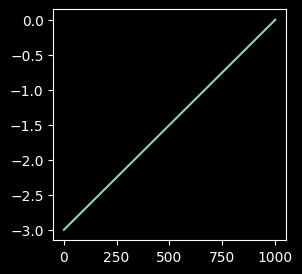

In [75]:
plt.figure(figsize=(3, 3))
plt.plot(x_ax, lre)

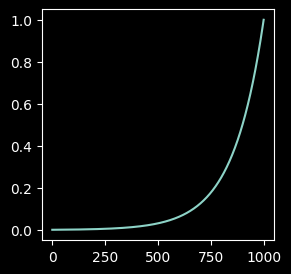

In [76]:
plt.figure(figsize=(3, 3))
plt.plot(x_ax, lrs)

In [77]:
g = torch.Generator().manual_seed(42)

# Матрица энкодингов
C = torch.randn((27, 2), generator=g)
# На вход три символа, закодированных 2 эмбеддингами = 6, в слое 100 нейронов
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100)
# На вход активации 100 нейронов, на выход вероятность каждой из 27 букв
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

Очень мелкий lr - почти не учимся (0.0001)

Приемлемый lr - учимся, вопрос с какой скоростью (0.1, 1)

Большой lr - не учимся (10)

In [78]:
lri = []
losses = []

for i in range(1000):
    # Construct minibatch
    ix = torch.randint(0, X.shape[0], (32,))

    # Forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])

    # backward pass
    for p in parameters:
        p.grad=None
    loss.backward()

    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad

    lri.append(lre[i])
    losses.append(loss.item())

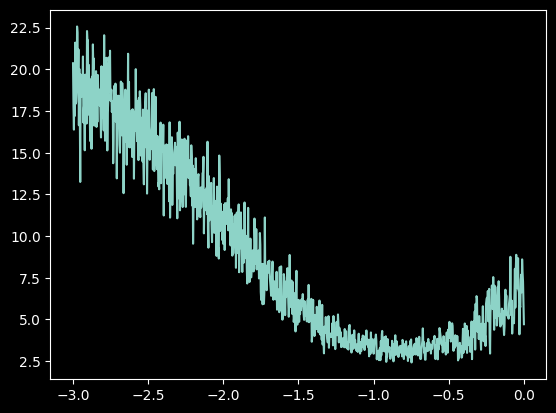

In [79]:
# Примерно в районе экспоненты веса -1 (10 ** -1, 0.1) находится базовый оптимальный вес, начинаем учиться с ним
plt.plot(lri, losses)

### Запускаем долгий расчет с хорошим LR

In [80]:
g = torch.Generator().manual_seed(42)

# Матрица энкодингов
C = torch.randn((27, 2), generator=g)
# На вход три символа, закодированных 2 эмбеддингами = 6, в слое 100 нейронов
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100)
# На вход активации 100 нейронов, на выход вероятность каждой из 27 букв
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [81]:
lri = []
losses = []

for i in range(10000):
    # Construct minibatch
    ix = torch.randint(0, X.shape[0], (32,))

    # Forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])

    # backward pass
    for p in parameters:
        p.grad=None
    loss.backward()
    losses.append(loss.item())
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad

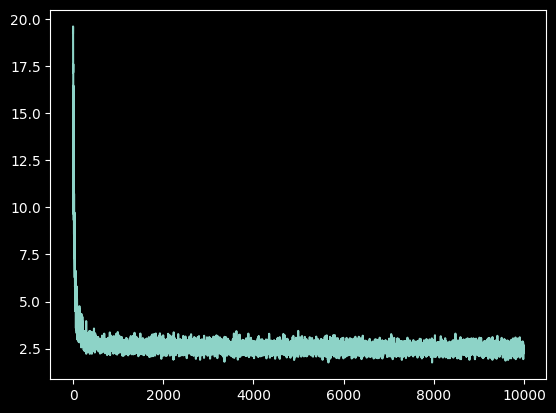

In [82]:
plt.plot(torch.arange(10000), losses)

После того как пришли к стабильному состоянию на большом LR можно проставить LR поменьше (вариант lr decay)

In [83]:
lri = []
losses = []

for i in range(10000):
    # Construct minibatch
    ix = torch.randint(0, X.shape[0], (32,))

    # Forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])

    # backward pass
    for p in parameters:
        p.grad=None
    loss.backward()
    losses.append(loss.item())
    lr = 0.001
    for p in parameters:
        p.data += -lr * p.grad

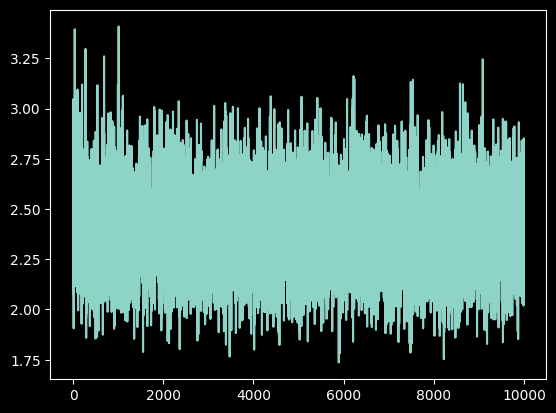

In [84]:
plt.plot(torch.arange(10000), losses)

In [85]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
f'{loss.item():3f}'

'2.383334'

### Добавляем деление на train / val / test set

In [86]:
# train - 80%
# val - 10%
# test - 10%

Не злоупотреблять тестированием на test set, иначе и на него можно оверфитнуться

In [87]:
def build_dataset(words):
    # build the dataset
    block_size = 3 # context length
    X, Y = [], []
    for w in words:
        # print(w)
        # Лист болванка из 0 для дальнейшего заполнения
        context = [0] * block_size
        # print(context)
        for ch in w + '.':
            # Индекс символа в словаре
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)

            # print(''.join(itos[i] for i in context), '------>', itos[ix])
            # Убрали первый символ, добавили новый
            context = context[1:] + [ix] # crop and append
            # print(context)

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

In [88]:
len(words)

32033

In [89]:
import random
random.seed(42)
random.shuffle(words)

n1 = int(len(words) * 0.8)
n2 = int(len(words) * 0.9)

X_train, Y_train = build_dataset(words[:n1])
X_val, Y_val = build_dataset(words[n1:n2])
X_test, Y_test = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [90]:
n1

25626

In [91]:
g = torch.Generator().manual_seed(42)

# Матрица энкодингов
C = torch.randn((27, 2), generator=g)
# На вход три символа, закодированных 2 эмбеддингами = 6, в слое 100 нейронов
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100)
# На вход активации 100 нейронов, на выход вероятность каждой из 27 букв
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [92]:
losses = []
for _ in range(30000):
    # Construct minibatch
    ix = torch.randint(0, X_train.shape[0], (32,))

    # Forward pass
    emb = C[X_train[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_train[ix])
    losses.append(loss.item())

    # backward pass
    for p in parameters:
        p.grad=None
    loss.backward()

    for p in parameters:
        p.data += -0.1 * p.grad
print(loss.item())

2.41282057762146


Evaluate

In [93]:
emb = C[X_val]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_val)
loss

tensor(2.3754, grad_fn=<NllLossBackward0>)

In [94]:
emb = C[X_train]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_train)
loss

tensor(2.3798, grad_fn=<NllLossBackward0>)

Видим похожий loss на train и val. Перфоманс примерно одинаковый, выводы из этого:
1) Мы не переобучились
2) ТК перфоманс на трейне не лучше перфоманса на val сете, мы возможно еще недоучились, можно получить лучший перфоманс (базово через скейлинг модели)

### Увеличиваем модель

In [95]:
g = torch.Generator().manual_seed(42)

# Матрица энкодингов
C = torch.randn((27, 2), generator=g)
# На вход три символа, закодированных 2 эмбеддингами = 6, в слое 100 нейронов
W1 = torch.randn((6, 300), generator=g)
b1 = torch.randn(300)
# На вход активации 100 нейронов, на выход вероятность каждой из 27 букв
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

print(sum(p.nelement() for p in parameters))

10281


In [96]:
lri = []
lossi = []
stepi = []


for i in range(30000):
    # Construct minibatch
    ix = torch.randint(0, X_train.shape[0], (256,))

    # Forward pass
    emb = C[X_train[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_train[ix])
    losses.append(loss.item())

    # backward pass
    for p in parameters:
        p.grad=None
    loss.backward()

    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad

    stepi.append(i)
    lossi.append(loss.item())

print(loss.item())

2.29240083694458


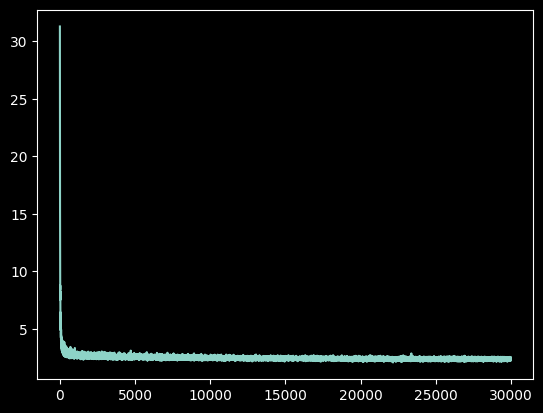

In [97]:
plt.plot(stepi, lossi)

In [98]:
emb = C[X_train]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_train)
print(f'Train set loss: {loss:.3f}')

emb = C[X_val]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_val)
print(f'Val set loss: {loss:.3f}')

Train set loss: 2.340
Val set loss: 2.342


Поигрались с lr и batch size, значимого прироста не получили, возможно слабое место модели - эмбеддинги, сейчас мы для каждого символа контекста дали кодировку из 2 эмбеддингов, возможно этого мало

Визуализация выученных эмбеддингов для букв

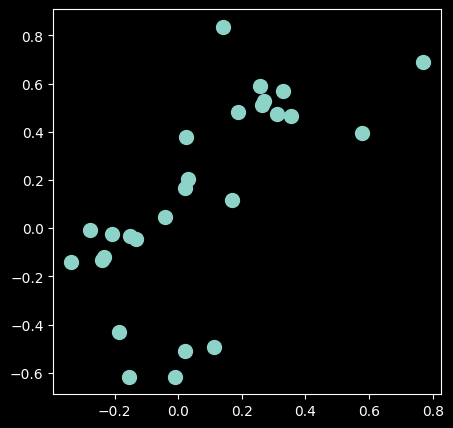

In [99]:
plt.figure(figsize=(5, 5))
plt.scatter(C[:, 0].data, C[:, 1].data, s=100)

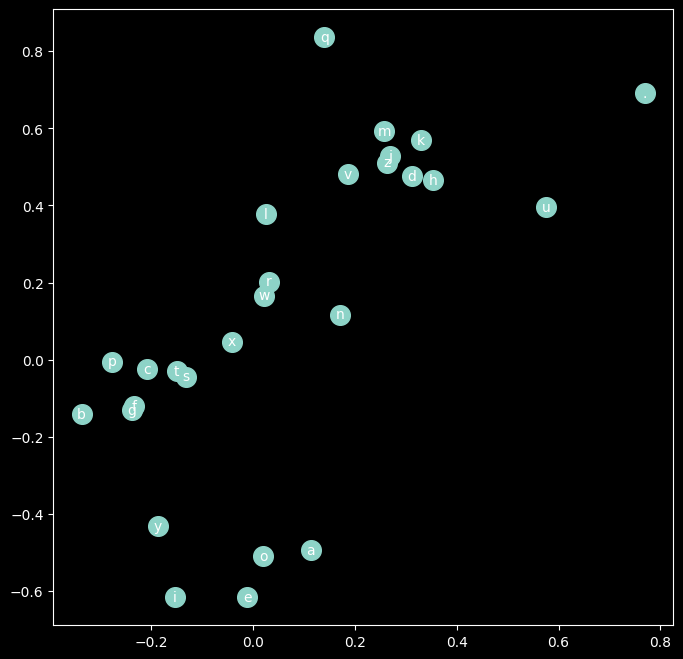

In [100]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)

for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha='center', va='center')

Что находится рядом друг с другом - близко по смыслу для нейронки

In [101]:
g = torch.Generator().manual_seed(42)

# Матрица энкодингов
C = torch.randn((27, 10), generator=g)
# На вход три символа, закодированных 2 эмбеддингами = 6, в слое 100 нейронов
W1 = torch.randn((30, 300), generator=g)
b1 = torch.randn(300)
# На вход активации 100 нейронов, на выход вероятность каждой из 27 букв
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

print(sum(p.nelement() for p in parameters))

17697


In [102]:
lri = []
lossi = []
stepi = []

In [103]:
for i in range(10000):
    # Construct minibatch
    ix = torch.randint(0, X_train.shape[0], (256,))

    # Forward pass
    emb = C[X_train[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # 32 100
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_train[ix])
    losses.append(loss.item())

    # backward pass
    for p in parameters:
        p.grad=None
    loss.backward()

    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad

    stepi.append(i)
    # lossi.append(loss.item())
    # Рисуем logloss, выглядит лучше
    lossi.append(loss.log10().item())
print(loss.item())

3.3243296146392822


In [104]:
# len(lossi)

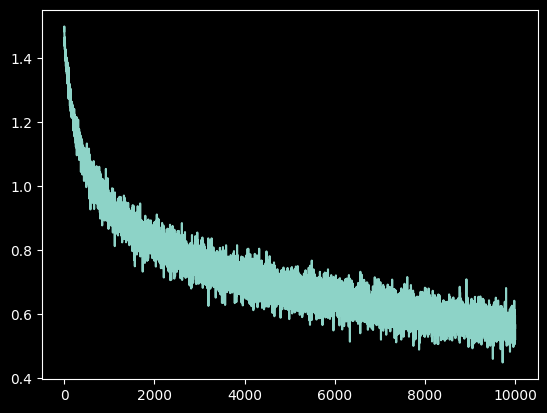

In [105]:
plt.plot(stepi, lossi)

In [106]:
emb = C[X_train]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # 32 100
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_train)
print(f'Train set loss: {loss:.3f}')

emb = C[X_val]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # 32 100
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_val)
print(f'Val set loss: {loss:.3f}')

Train set loss: 3.649
Val set loss: 3.658


### Семплирование

In [107]:
g = torch.Generator().manual_seed(42)

for _ in range(20):
    out = []
    context = [0] * block_size # старт с ...
    while True:
        # Контекст на вход, в начале ..., далее заполняется сгенерированными буквами
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        # exps logits
        probs = F.softmax(logits, dim=-1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(itos[i] for i in out))

anuge.
neodalardida.
danius.
nasia.
yokrrouse.
cou.
le.
eil.
callan.
dkan.
keic.
joknyomon.
lor.
mibi.
ynly.
celinhea.
salima.
nareepe.
siman.
talonente.
